In [ ]:
# Block 1: Import libraries and generate dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Generate dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=10,
    n_classes=2,
    flip_y=0.15,
    random_state=42
)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Block 2: Function to evaluate tree (accuracy, precision, recall)
def evaluate_tree(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
   # print("Depth : ",clf.get_depth())
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_prec = precision_score(y_train, y_train_pred, average='macro', zero_division=0)
    test_prec = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
    train_rec = recall_score(y_train, y_train_pred, average='macro', zero_division=0)
    test_rec = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
    return train_acc, test_acc, train_prec, test_prec, train_rec, test_rec

d=1: Train Acc=0.76, Test Acc=0.77, Train Prec=0.77, Test Prec=0.78, Train Rec=0.76, Test Rec=0.76
d=7: Train Acc=0.92, Test Acc=0.84, Train Prec=0.92, Test Prec=0.85, Train Rec=0.92, Test Rec=0.85
d=20: Train Acc=1.00, Test Acc=0.77, Train Prec=1.00, Test Prec=0.77, Train Rec=1.00, Test Rec=0.77


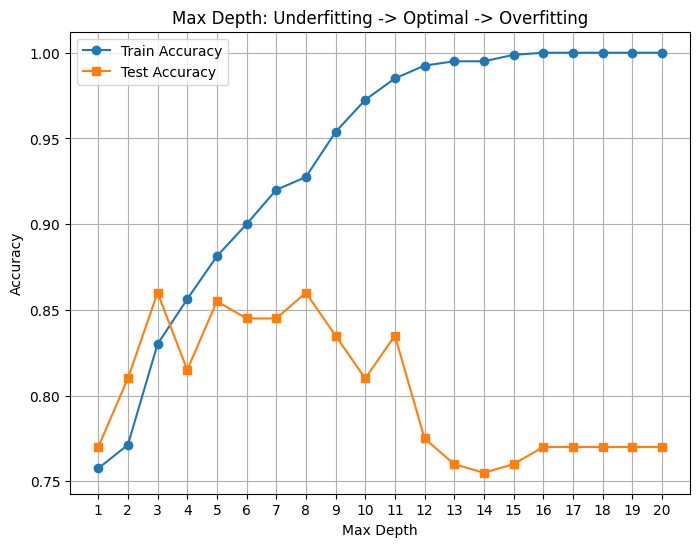

In [ ]:
# Block 3: Vary max_depth (1 to 20)
depths = range(1, 21)
train_acc_depth = []
test_acc_depth = []
train_prec_depth = []
test_prec_depth = []
train_rec_depth = []
test_rec_depth = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42, splitter='best')
    train_acc, test_acc, train_prec, test_prec, train_rec, test_rec = evaluate_tree(clf, X_train, y_train, X_test, y_test)
    train_acc_depth.append(train_acc)
    test_acc_depth.append(test_acc)
    train_prec_depth.append(train_prec)
    test_prec_depth.append(test_prec)
    train_rec_depth.append(train_rec)
    test_rec_depth.append(test_rec)

# Print sample metrics at key points

print(f"d=1: Train Acc={train_acc_depth[0]:.2f}, Test Acc={test_acc_depth[0]:.2f}, Train Prec={train_prec_depth[0]:.2f}, Test Prec={test_prec_depth[0]:.2f}, Train Rec={train_rec_depth[0]:.2f}, Test Rec={test_rec_depth[0]:.2f}")
print(f"d=7: Train Acc={train_acc_depth[6]:.2f}, Test Acc={test_acc_depth[6]:.2f}, Train Prec={train_prec_depth[6]:.2f}, Test Prec={test_prec_depth[6]:.2f}, Train Rec={train_rec_depth[6]:.2f}, Test Rec={test_rec_depth[6]:.2f}")
print(f"d=20: Train Acc={train_acc_depth[19]:.2f}, Test Acc={test_acc_depth[19]:.2f}, Train Prec={train_prec_depth[19]:.2f}, Test Prec={test_prec_depth[19]:.2f}, Train Rec={train_rec_depth[19]:.2f}, Test Rec={test_rec_depth[19]:.2f}")

# Plot: scatter for accuracy only
plt.figure(figsize=(8, 6))
plt.plot(depths, train_acc_depth, label='Train Accuracy', marker='o')
plt.plot(depths, test_acc_depth, label='Test Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth: Underfitting -> Optimal -> Overfitting')
plt.legend()
plt.grid(True)
plt.xticks(depths)  # All integers visible
plt.show()

ms=2: Train Acc=1.00, Test Acc=0.77, Train Prec=1.00, Test Prec=0.77, Train Rec=1.00, Test Rec=0.77
ms=50: Train Acc=0.88, Test Acc=0.82, Train Prec=0.88, Test Prec=0.82, Train Rec=0.88, Test Rec=0.82
ms=200: Train Acc=0.83, Test Acc=0.82, Train Prec=0.83, Test Prec=0.82, Train Rec=0.83, Test Rec=0.82


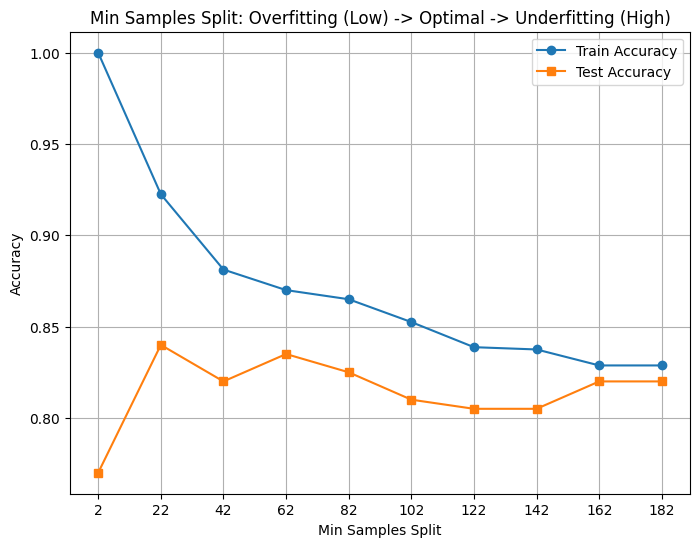

In [ ]:
# Block 4: Vary min_samples_split (2 to 200 step 20)
min_splits = range(2, 201, 20)
train_acc_split = []
test_acc_split = []
train_prec_split = []
test_prec_split = []
train_rec_split = []
test_rec_split = []

for ms in min_splits:
    clf = DecisionTreeClassifier(min_samples_split=ms, max_depth=None, random_state=42, splitter='best')
    train_acc, test_acc, train_prec, test_prec, train_rec, test_rec = evaluate_tree(clf, X_train, y_train, X_test, y_test)
    train_acc_split.append(train_acc)
    test_acc_split.append(test_acc)
    train_prec_split.append(train_prec)
    test_prec_split.append(test_prec)
    train_rec_split.append(train_rec)
    test_rec_split.append(test_rec)

# Print sample metrics (Low=2 Overfit, Mid=50 Optimal, High=200 Underfit)

idx_low, idx_mid, idx_high = 0, 2, 9
print(f"ms=2: Train Acc={train_acc_split[idx_low]:.2f}, Test Acc={test_acc_split[idx_low]:.2f}, Train Prec={train_prec_split[idx_low]:.2f}, Test Prec={test_prec_split[idx_low]:.2f}, Train Rec={train_rec_split[idx_low]:.2f}, Test Rec={test_rec_split[idx_low]:.2f}")
print(f"ms=50: Train Acc={train_acc_split[idx_mid]:.2f}, Test Acc={test_acc_split[idx_mid]:.2f}, Train Prec={train_prec_split[idx_mid]:.2f}, Test Prec={test_prec_split[idx_mid]:.2f}, Train Rec={train_rec_split[idx_mid]:.2f}, Test Rec={test_rec_split[idx_mid]:.2f}")
print(f"ms=200: Train Acc={train_acc_split[idx_high]:.2f}, Test Acc={test_acc_split[idx_high]:.2f}, Train Prec={train_prec_split[idx_high]:.2f}, Test Prec={test_prec_split[idx_high]:.2f}, Train Rec={train_rec_split[idx_high]:.2f}, Test Rec={test_rec_split[idx_high]:.2f}")

# Plot: scatter for accuracy only
plt.figure(figsize=(8, 6))
plt.plot(min_splits, train_acc_split, label='Train Accuracy', marker='o')
plt.plot(min_splits, test_acc_split, label='Test Accuracy', marker='s')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Min Samples Split: Overfitting (Low) -> Optimal -> Underfitting (High)')
plt.legend()
plt.grid(True)
plt.xticks(min_splits)  # All integers visible
plt.show()

Min Samples Leaf Metrics (Overfit ml=1, Optimal ml=40, Underfit ml=100):
ml=1: Train Acc=1.00, Test Acc=0.77, Train Prec=1.00, Test Prec=0.77, Train Rec=1.00, Test Rec=0.77
ml=40: Train Acc=0.83, Test Acc=0.83, Train Prec=0.83, Test Prec=0.83, Train Rec=0.83, Test Rec=0.83
ml=100: Train Acc=0.80, Test Acc=0.81, Train Prec=0.80, Test Prec=0.82, Train Rec=0.80, Test Rec=0.82


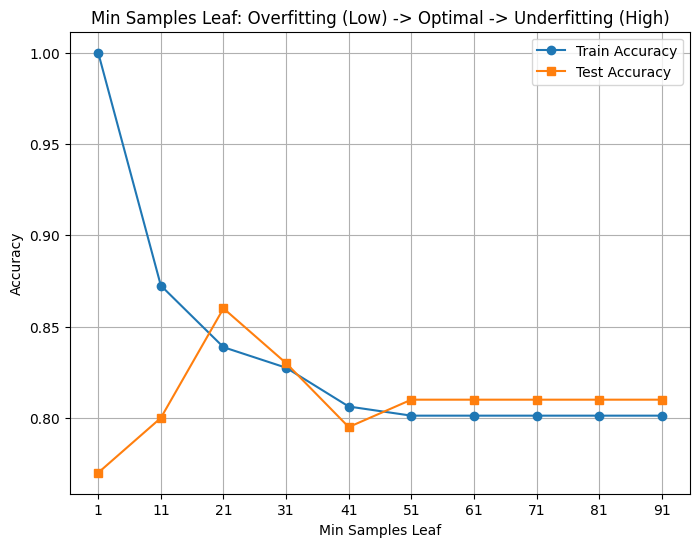

In [ ]:
# Block 5: Vary min_samples_leaf (1 to 100 step 10)
min_leaves = range(1, 101, 10)
train_acc_leaf = []
test_acc_leaf = []
train_prec_leaf = []
test_prec_leaf = []
train_rec_leaf = []
test_rec_leaf = []

for ml in min_leaves:
    clf = DecisionTreeClassifier(min_samples_leaf=ml, max_depth=None, random_state=42, splitter='best')
    train_acc, test_acc, train_prec, test_prec, train_rec, test_rec = evaluate_tree(clf, X_train, y_train, X_test, y_test)
    train_acc_leaf.append(train_acc)
    test_acc_leaf.append(test_acc)
    train_prec_leaf.append(train_prec)
    test_prec_leaf.append(test_prec)
    train_rec_leaf.append(train_rec)
    test_rec_leaf.append(test_rec)

# Print sample metrics (Low=1 Overfit, Mid=40 Optimal, High=100 Underfit)
print("Min Samples Leaf Metrics (Overfit ml=1, Optimal ml=40, Underfit ml=100):")
idx_low, idx_mid, idx_high = 0, 3, 9
print(f"ml=1: Train Acc={train_acc_leaf[idx_low]:.2f}, Test Acc={test_acc_leaf[idx_low]:.2f}, Train Prec={train_prec_leaf[idx_low]:.2f}, Test Prec={test_prec_leaf[idx_low]:.2f}, Train Rec={train_rec_leaf[idx_low]:.2f}, Test Rec={test_rec_leaf[idx_low]:.2f}")
print(f"ml=40: Train Acc={train_acc_leaf[idx_mid]:.2f}, Test Acc={test_acc_leaf[idx_mid]:.2f}, Train Prec={train_prec_leaf[idx_mid]:.2f}, Test Prec={test_prec_leaf[idx_mid]:.2f}, Train Rec={train_rec_leaf[idx_mid]:.2f}, Test Rec={test_rec_leaf[idx_mid]:.2f}")
print(f"ml=100: Train Acc={train_acc_leaf[idx_high]:.2f}, Test Acc={test_acc_leaf[idx_high]:.2f}, Train Prec={train_prec_leaf[idx_high]:.2f}, Test Prec={test_prec_leaf[idx_high]:.2f}, Train Rec={train_rec_leaf[idx_high]:.2f}, Test Rec={test_rec_leaf[idx_high]:.2f}")

# Plot: scatter for accuracy only
plt.figure(figsize=(8, 6))
plt.plot(min_leaves, train_acc_leaf, label='Train Accuracy', marker='o')
plt.plot(min_leaves, test_acc_leaf, label='Test Accuracy', marker='s')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Min Samples Leaf: Overfitting (Low) -> Optimal -> Underfitting (High)')
plt.legend()
plt.grid(True)
plt.xticks(min_leaves)  # All integers visible
plt.show()

Splitter Metrics (Best, Random):
Best: Train Acc=0.76, Test Acc=0.77, Train Prec=0.77, Test Prec=0.78, Train Rec=0.76, Test Rec=0.76
Random: Train Acc=0.56, Test Acc=0.59, Train Prec=0.68, Test Prec=0.69, Train Rec=0.57, Test Rec=0.55


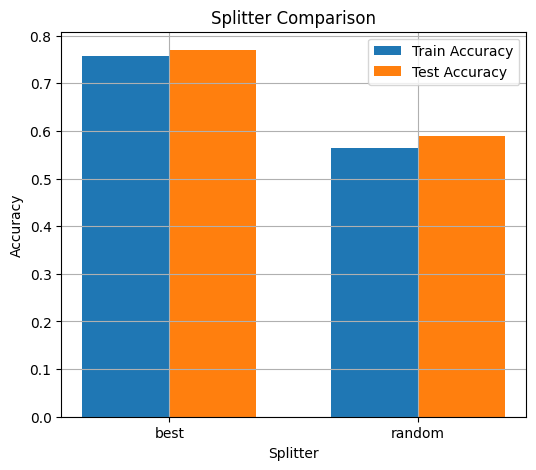

In [ ]:
# Block 8: Vary splitter ('best' vs 'random')
splitters = ['best', 'random']
train_acc_splitter = []
test_acc_splitter = []
train_prec_splitter = []
test_prec_splitter = []
train_rec_splitter = []
test_rec_splitter = []

for s in splitters:
    if s == 'best':
        clf = DecisionTreeClassifier(splitter='best', max_depth = 1)
    else:
        clf = DecisionTreeClassifier(splitter='random', max_depth = 1)
    train_acc, test_acc, train_prec, test_prec, train_rec, test_rec = evaluate_tree(clf, X_train, y_train, X_test, y_test)
    train_acc_splitter.append(train_acc)
    test_acc_splitter.append(test_acc)
    train_prec_splitter.append(train_prec)
    test_prec_splitter.append(test_prec)
    train_rec_splitter.append(train_rec)
    test_rec_splitter.append(test_rec)

# Print metrics
print("Splitter Metrics (Best, Random):")
print(f"Best: Train Acc={train_acc_splitter[0]:.2f}, Test Acc={test_acc_splitter[0]:.2f}, Train Prec={train_prec_splitter[0]:.2f}, Test Prec={test_prec_splitter[0]:.2f}, Train Rec={train_rec_splitter[0]:.2f}, Test Rec={test_rec_splitter[0]:.2f}")
print(f"Random: Train Acc={train_acc_splitter[1]:.2f}, Test Acc={test_acc_splitter[1]:.2f}, Train Prec={train_prec_splitter[1]:.2f}, Test Prec={test_prec_splitter[1]:.2f}, Train Rec={train_rec_splitter[1]:.2f}, Test Rec={test_rec_splitter[1]:.2f}")

# Plot: bar for accuracy only
x = range(len(splitters))
width = 0.35
plt.figure(figsize=(6, 5))
plt.bar([i - width/2 for i in x], train_acc_splitter, width, label='Train Accuracy')
plt.bar([i + width/2 for i in x], test_acc_splitter, width, label='Test Accuracy')
plt.xlabel('Splitter')
plt.ylabel('Accuracy')
plt.title('Splitter Comparison')
plt.grid(True)
plt.xticks(x, splitters)
plt.legend()
plt.show()

In [ ]:
# Create the best model
clf_best = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=22,
    min_samples_leaf=21,
    splitter='best'
)

# Fit the model
clf_best.fit(X_train, y_train)

# Get metrics
train_acc, test_acc, train_prec, test_prec, train_rec, test_rec = evaluate_tree(clf_best, X_train, y_train, X_test, y_test)

# Print metrics
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Train Precision: {train_prec:.3f}")
print(f"Test Precision: {test_prec:.3f}")
print(f"Train Recall: {train_rec:.3f}")
print(f"Test Recall: {test_rec:.3f}")

Train Accuracy: 0.815
Test Accuracy: 0.850
Train Precision: 0.815
Test Precision: 0.850
Train Recall: 0.815
Test Recall: 0.853


In [ ]:
# Grid Search CV

param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 10, 20, 30],
    'splitter': ['best', 'random']
}


clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

clf_best = grid_search.best_estimator_
print("Best Parameters:")
print(grid_search.best_params_)


train_acc, test_acc, train_prec, test_prec, train_rec, test_rec = evaluate_tree(clf_best, X_train, y_train, X_test, y_test)


print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Train Precision: {train_prec:.3f}")
print(f"Test Precision: {test_prec:.3f}"
print(f"Train Recall: {train_rec:.3f}")
print(f"Test Recall: {test_rec:.3f}")

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
Train Accuracy: 0.844
Test Accuracy: 0.870
Train Precision: 0.845
Test Precision: 0.870
Train Recall: 0.843
Test Recall: 0.873


In [ ]:
# @title
# Bagging
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42,max_depth = 7), n_estimators=30, random_state=42)
train_acc, test_acc, train_prec, test_prec, train_rec, test_rec = evaluate_tree(bag_clf, X_train, y_train, X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Train Accuracy: 0.936
Test Accuracy: 0.890


In [ ]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=30, max_depth =7,max_features='sqrt',random_state=42)
train_acc, test_acc, train_prec, test_prec, train_rec, test_rec = evaluate_tree(rf_clf, X_train, y_train, X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Train Accuracy: 0.936
Test Accuracy: 0.900
